In [1]:
import pandas as pd , numpy as np, matplotlib.pyplot as plt, seaborn as sns

### Covariance
Covariance is a statistical measure that describes the degree to which two variables are
linearly related. It measures how much two variables change together, such that when
one variable increases, does the other variable also increase, or does it decrease?

If the covariance between two variables is positive, it means that the variables tend to
move together in the same direction. If the covariance is negative, it means that the
variables tend to move in opposite directions. A covariance of zero indicates that the
variables are not linearly related.

In [42]:
a = np.array([[0,2],[1,1],[2,0]])
a

array([[0, 2],
       [1, 1],
       [2, 0]])

In [44]:
np.cov(a,rowvar=False)

array([[ 1., -1.],
       [-1.,  1.]])

In [50]:
x = pd.Series([0,1,2])
y = x*2
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df

,x,y
0,0,0
1,1,2
2,2,4


In [65]:
np.cov(df['x'],df['y'])

array([[1., 2.],
       [2., 4.]])

In [83]:
a = np.array([10,21,55,43,51,39,73,87])
b = np.array([11,75,36,47,38,69,78,85])

In [100]:
np.cov(a,b)

array([[639.98214286, 372.33928571],
       [372.33928571, 667.83928571]])

In [84]:
data = pd.DataFrame()
data['a'] = a
data['b'] = b

In [103]:
data

,a,b
0,10,11
1,21,75
2,55,36
3,43,47
4,51,38
5,39,69
6,73,78
7,87,85


Text(0.5, 1.0, 'Covariance 1489.3571428571427')

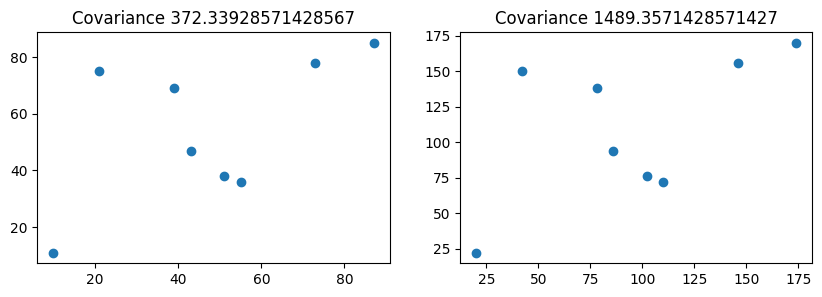

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.scatter(data['a'],data['b'])
ax2.scatter(data['a']*2,data['b']*2)

ax1.set_title('Covariance ' + str(np.cov(data['a'],data['b'])[0,1]))
ax2.set_title('Covariance ' + str(np.cov(data['a']*2,data['b']*2)[0,1]))

Text(0.5, 1.0, 'Covariance 3990672.1607142854')

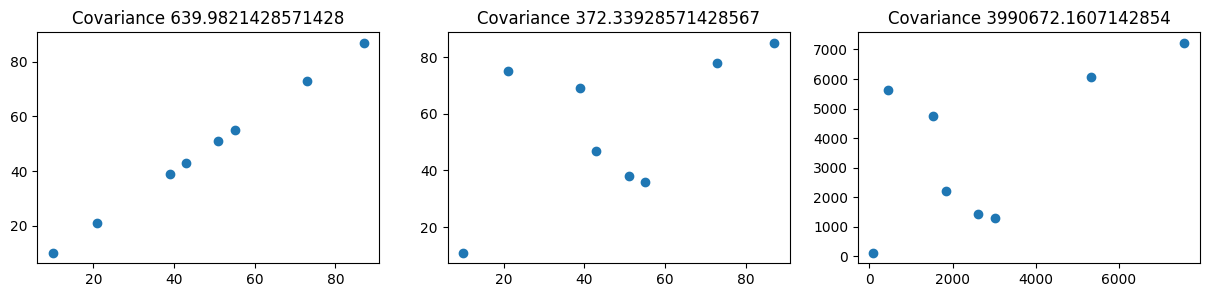

In [116]:
fig,(a,b,c) = plt.subplots(1,3,figsize=(15,3))

a.scatter(data['a'],data['a'])
a.set_title("Covariance " + str(np.cov(data['a'])))

b.scatter(data['a'],data['b'])
b.set_title('Covariance ' + str(np.cov(data['a'],data['b'])[0,1]))

c.scatter(data['a']**2,data['b']**2)
c.set_title('Covariance ' + str(np.cov(data['a']**2,data['b']**2)[0,1]))

In [117]:
def covariance(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    diff = 0
    for xx, yy in zip(x,y):
        diff += ((xx - x_mean) * (yy - y_mean))
    return diff/(len(x) - 1)

In [118]:
covariance(data['a'],data['b'])

np.float64(372.3392857142857)

One limitation of covariance is that it does not tell us about the strength of the
relationship between two variables, since the magnitude of covariance is affected by the
scale of the variables.

### Correlation
Correlation refers to a statistical relationship between two or more variables.
Specifically, it measures the degree to which two variables are related and
how they tend to change together.

Correlation is often measured using a statistical tool called the correlation
coefficient, which ranges from -1 to 1. A correlation coefficient of -1 indicates
a perfect negative correlation, a correlation coefficient of 0 indicates no
correlation, and a correlation coefficient of 1 indicates a perfect positive
correlation.

In [124]:
data['a'].corr(data['b'])

np.float64(0.5695330768410258)

Text(0.5, 1.0, 'Correlation 0.5695330768410258')

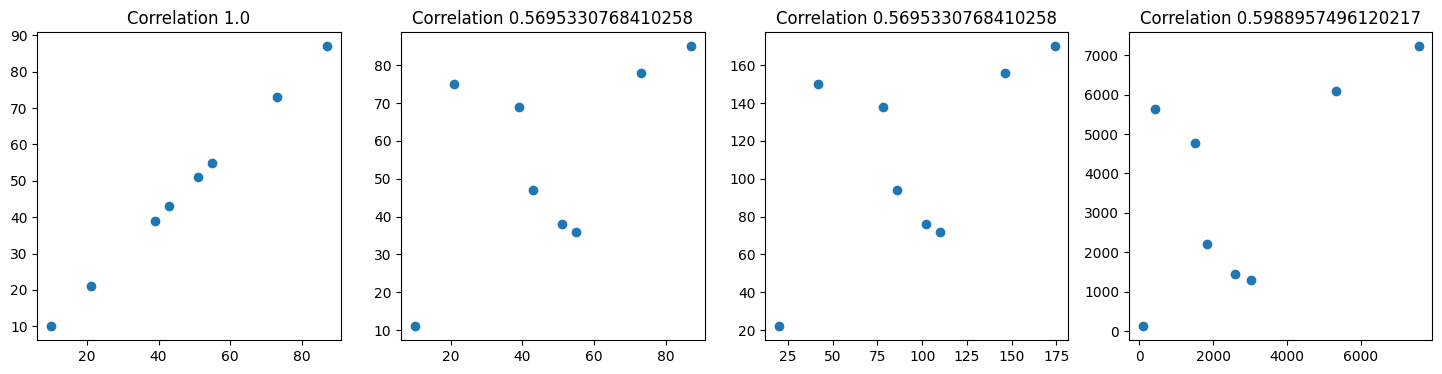

In [148]:
fig, (a,b,c,d) = plt.subplots(1,4,figsize=(18,4))

a.scatter(data['a'],data['a'])
a.set_title("Correlation " + str(data['a'].corr(data['a'])))

b.scatter(data['a'],data['b'])
b.set_title('Correlation ' + str(data['a'].corr(data['b'])))

d.scatter(data['a']**2,data['b']**2)
d.set_title('Correlation ' + str((data['a']**2).corr(data['b']**2)))

c.scatter(data['a']*2,data['b']*2)
c.set_title('Correlation ' + str((data['a']*2).corr(data['b']*2)))

In [ ]:
def correlation(x,y):
    x_std = np.std(x,ddof=1) #ddof = 1, because we are working on a sample
    y_std = np.std(y,ddof=1)
    cov = covariance(x, y)
    return cov/(x_std * y_std)

In [152]:
correlation(data['a'],data['b'])

np.float64(0.5695330768410258)